# Biclustering CC
Implementation proposed by Cheng & Church in Biclustering of Expression Data

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import consensus_score

In [4]:
%%latex
Define Mean Squeae Residue (MSR)$H(I,J)$:
$$H(I,J) = \frac{1}{|I||J|} \sum_{i \in I} \sum_{j \in J} (a_{ij} - a_{Ij} - a_{iJ} + a_{IJ})^2$$
where:
$$a_{iJ} = \frac{1}{|J|} \sum_{j \in J} a_{ij}$$
$$a_{Ij} = \frac{1}{|I|} \sum_{i \in I} a_{ij}$$
$$a_{IJ} = \frac{1}{|I||J|} \sum_{i \in I, j \in J} a_{ij}$$


<IPython.core.display.Latex object>

In [5]:
class MSR(object):
    def __init__(self,data):
        self.data=data
        self.n, self.m = data.shape
        self.aiJ = np.mean(data,axis=1)
        self.aIj = np.mean(data,axis=0)
        self.aIJ = np.mean(data)
        self._H = None
        self._HiJ = None
        self._HIj = None
    
    @property
    def H(self):
        if self._H is None:
            print ("computing MSR ...")
            self._H = self._compute_H()
            print ("MSR VALUE " + str(self._H))
        return self._H
        
    @property
    def HiJ(self):
        if self._HiJ is None:
            self._HiJ = self._compute_HiJ()
        return self._HiJ
    
    @property
    def HIj(self):
        if self._HIj is None:
            self._HIj = self._compute_HIj()
        return self._HIj
    
    def _compute_H(self):
        H = 0
        for i in range(self.n):
            for j in range(self.m):
                H  += (self.data[i,j] - self.aIj[j] - self.aiJ[i] + self.aIJ ) ** 2
        H *= 1.0/(self.n + self.m)       
        return H
    
    def _compute_HiJ(self):
        HiJ = np.zeros(self.n)
        for i in range(self.n):
            for j in range(self.m):
                HiJ[i] += ( self.data[i,j] - self.aIj[j] - self.aiJ[i] + self.aIJ )**2
        HiJ *= 1.0/self.m
        return HiJ


    def _compute_HIj(self):
        HIj = np.zeros(self.m)
        for j in range(self.m):
            for i in range(self.n):
                HIj[j] += ( self.data[i,j] - self.aIj[j] - self.aiJ[i] + self.aIJ )**2
        HIj *= 1.0/self.n
        return HIj


        

In [19]:
import random
import gc
import pandas as pd
import glob
#data  = np.random.random((5, 5))
diFiles=glob.glob("../data/Di/*")
diFiles
data

array([[ 0.44062552,  0.10949537,  0.3262633 ,  0.70788061,  0.20094554],
       [ 0.7185738 ,  0.16711722,  0.27850895,  0.13011807,  0.95465451],
       [ 0.6649713 ,  0.59390287,  0.63585462,  0.37923611,  0.42826361],
       [ 0.5534395 ,  0.7130889 ,  0.52257928,  0.98393902,  0.58651534],
       [ 0.18170839,  0.45674324,  0.22967485,  0.88010236,  0.93258797]])

In [20]:
trainIndexFiles=glob.glob("../Train/*")
frames = list()
for f in trainIndexFiles:
    indices = pd.read_csv(f,sep=";")
    indexList=list(indices['0'])
    protein = f.split("/")[-1].split(".")[0]
    fpath = '../data/Di/'+f.split("/")[-1].split(".")[0]+".csv"
    diRead = pd.read_csv(fpath,sep=";")
    diPartialTrain=diRead[diRead.columns[5:]].loc[indexList].copy()
    diPartialTrain.insert(0,column='Protein',value =protein )
    del diRead
    gc.collect()
    frames.append(diPartialTrain)

In [23]:
diTrain = pd.concat(frames)
diTrain[diTrain.columns[1:]].head()

,X0min_neg_effect-X0min_neg_cause,X15min_effect-X0min_neg_cause,X15min_effect-X15min_cause,X30min_effect-X0min_neg_cause,X30min_effect-X15min_cause,X30min_effect-X30min_cause,X90min_effect-X0min_neg_cause,X90min_effect-X15min_cause,X90min_effect-X30min_cause,X90min_effect-X90min_cause,...,X240min_effect-X240min_cause,X360min_effect-X0min_neg_cause,X360min_effect-X15min_cause,X360min_effect-X30min_cause,X360min_effect-X90min_cause,X360min_effect-X120min_cause,X360min_effect-X180min_cause,X360min_effect-X210min_cause,X360min_effect-X240min_cause,X360min_effect-X360min_cause
1530,-1.398215,-1.332073,-1.176495,-1.152913,-0.997335,-1.138456,-0.748848,-0.593270,-0.734391,-0.921105,...,2.750291,-0.626720,-0.471142,-0.612263,-0.798977,0.539404,1.340642,1.469409,1.965642,1.504612
1531,-1.398215,-2.044245,-2.118504,-1.532107,-1.606366,-1.470422,-1.569035,-1.643294,-1.507350,-1.334550,...,0.370043,-1.108882,-1.183141,-1.047197,-0.874397,-1.075918,-0.703188,-0.427842,-0.257982,0.510709
1532,-1.788833,-2.585672,-2.277672,-1.168975,-0.860975,-1.271061,0.322233,0.630234,0.220148,0.914710,...,1.514755,-0.227687,0.080314,-0.329772,0.364790,0.983367,0.419474,2.833032,1.480500,3.645275
1533,-1.788833,-1.823722,-1.514011,-1.545921,-1.236210,-1.757871,-0.847480,-0.537768,-1.059429,-0.769465,...,0.379215,-3.095851,-2.786140,-3.307800,-3.017836,-3.030779,-2.279847,-2.823244,-2.188745,-2.846625
1535,-1.375053,-1.252870,-1.363479,-0.796131,-0.906741,-1.598657,-0.169129,-0.279739,-0.971655,-0.806521,...,1.312185,0.099997,-0.010613,-0.702529,-0.537396,-0.619269,-0.279518,-0.051200,0.444093,-0.952516


In [48]:
data = diTrain[diTrain.columns[1:]].as_matrix()[0:100]


In [43]:
msr = MSR(data)
print ("aIJ= " + str(msr.aIJ))
print ("H= " + str(msr.H))
print ("aiJ= " + str(msr.aiJ))
print ("aIj= " + str(msr.aIj))

ValueError: not enough values to unpack (expected 2, got 1)

In [44]:
def remove_unique_nodes(data, delta, I=None, J=None):
    it = 1
    
    if I is None:
        I = np.arange(len(data))
    
    if J is None:    
        J = np.arange(len(data[0]))
        
    while True:
        it += 1
        
        msr = MSR(data[I][:,J])
        
        if msr.H <delta:
            break
            
        if len(I) == 1 or len(J) == 1:
            break
        
        row_idx_to_remove = np.argmax(msr.HiJ)
        col_idx_to_remove = np.argmax(msr.HIj)
        
        if msr.HiJ[row_idx_to_remove] > msr.HIj[col_idx_to_remove]:
            print("removing row " + str(row_idx_to_remove))
            I = np.delete(I,row_idx_to_remove)
            
        else:
            print("removing col " + str(col_idx_to_remove))
            J = np.delete(J, col_idx_to_remove)
            
    return (data[I][:,J],I,J)
        
    

In [34]:
def remove_multiple_nodes(data, delta, alpha, I=None, J = None):
    it = 1
    if I is None:
        I = np.arange(len(data))
    
    if J is None:    
        J = np.arange(len(data[0]))
        
    removal_ocurred = True
    
    while True:
        it += 1
        
        msr = MSR(data[I][:,J]) 
        
        if msr.H <delta:
            break
        if len(I) == 1 or len(J) == 1:
            break
            
        row_idxs_to_remove = np.nonzero(msr.HiJ > alpha*msr.H)[0]
        
        if len(row_idxs_to_remove) > 0:
            I = np.delete(I, row_idxs_to_remove)
        else:
            removal_ocurred = False
            
        msr = MSR(data[I][:,J])
        
        cols_idxs_to_remove= np.nonzero(msr.HIj > alpha*msr.H)[0]
        
        if len(cols_idxs_to_remove) > 0:
            J = np.delete(J, cols_idxs_to_remove)
            
        else:
            if not removal_ocurred:
                return remove_unique_nodes (data[I][:,J], delta, I, J)
    
    return (data[I][:,J],I,J)
        
        

In [35]:
def add_nodes(data, orig_data, alpha, I, J):
    it = 1
    orig_n, orig_m = orig_data.shape
    orig_I = np.arange(orig_n)
    orig_J = np.arange(orig_m)
    I_not_in_bicluster = np.setdiff1d(orig_I, I)
    J_not_in_bicluster = np.setdiff1d(orig_J, J)
    addition_ocurred = True
    while addition_ocurred:
        print ("%s iteration of node addition..." % it)
        it += 1
        addition_ocurred = False
        msr = MSR(orig_data[I][:,J])
        # column addition
        for j in J_not_in_bicluster:
            data_with_j = np.column_stack((data, orig_data[I][:,j]))
            msr_with_j = MSR(data_with_j)
            if msr_with_j.HIj[-1] <= msr.H:
                J = np.append(J, j)
                J_not_in_bicluster = np.delete(J_not_in_bicluster, np.where(j == J_not_in_bicluster)[0])
                data = data_with_j
                addition_ocurred = True
        msr = MSR(orig_data[I][:,J])
        # row addition
        for i in I_not_in_bicluster:
            data_with_i = np.row_stack((data, orig_data[i,J]))
            msr_with_i = MSR(data_with_i)
            if msr_with_i.HIj[-1] <= msr.H:
                I = np.append(I, i)
                I_not_in_bicluster = np.delete(I_not_in_bicluster, np.where(i == I_not_in_bicluster)[0])
                data = data_with_i
                adition_ocurred = True
# My guess is that we don't need invertions, because we are not in genes expression domain        
        # inverted row addition
#         msr = MSR(orig_data)
#         rows_idxs_to_add_overlap = np.nonzero(msr.HIj <= alpha*msr.H)[0]
#         rows_idxs_to_add = np.setdiff1d(rows_idxs_to_add_overlap, new_I)
#         if len(rows_idxs_to_add) > 0:
#             new_I = np.append(new_I, rows_idxs_to_add)
#             inverted_rows = np.fliplr(orig_data[rows_idxs_to_add][:,J])
#             data = np.row_stack((data, inverted_rows))
#         else:
#             addition_ocurred = False
    return (orig_data[I][:,J],I,J)


In [36]:
def mask(data, I, J, min_v, max_v):
    for i in I:
        for j in J:
            data[i,j] = random.uniform(min_v, max_v)
    return data

(15998, 45)


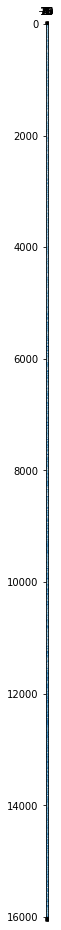

--- Looking for bicluster 1:
computing MSR ...
MSR VALUE 66.9790915145
removing row 1583
computing MSR ...
MSR VALUE 66.9665177722
removing row 13231
computing MSR ...
MSR VALUE 66.9540607144


KeyboardInterrupt: 

In [37]:
# %debug
def find_biclusters(data, delta, alpha, num_biclusters, num_iterations=1):
#     import pdb; pdb.set_trace()
    biclusters = []

    min_v = np.min(data)
    max_v = np.max(data)

    for i in range(num_biclusters):
        n, m = data.shape
        print (data.shape)

        plt.matshow(data, cmap=plt.cm.Blues, vmin=min_v, vmax=max_v)
        plt.show()

        print ("--- Looking for bicluster %s:" % (i+1))

        # do not perform multiple node deletion
        if len(data) < 100 or len(data[0]) < 100:
            (C,I,J) = remove_unique_nodes(data, delta)
        else:
            (C,I,J) = remove_multiple_nodes(data, delta, alpha)

        (D,I,J) = add_nodes(C, data, alpha, I, J)

        biclusters.append(D.copy())

        plt.matshow(D, cmap=plt.cm.Blues, vmin=min_v, vmax=max_v)
        plt.show()

        A_line = mask(data, I, J, min_v, max_v)

    return biclusters

num_biclusters = 2
biclusters = find_biclusters(data, 1.0, 1.0, num_biclusters)